In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [18]:
bd2020 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2020.xlsx')
bd2021 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2021.xlsx')
bd2022 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2022.xlsx')
bd2023 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2023.xlsx')
bd2024 = pd.read_excel('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\Total_De_Eventos\\Eventos Municipal\\2024.xlsx')


In [21]:
# Seleccionar solo las columnas necesarias y agregar la columna del año
bd2020 = bd2020[['Entidad Federativa / Municipio', 'Total']]
bd2020['Año'] = 2020

bd2021 = bd2021[['Entidad Federativa / Municipio', 'Total']]
bd2021['Año'] = 2021

bd2022 = bd2022[['Entidad Federativa / Municipio', 'Total']]
bd2022['Año'] = 2022

bd2023 = bd2023[['Entidad Federativa / Municipio', 'Total']]
bd2023['Año'] = 2023

bd2024 = bd2024[['Entidad Federativa / Municipio', 'Total']]
bd2024['Año'] = 2024

# Unir todos los dataframes en uno solo
df_concat = pd.concat([bd2020, bd2021, bd2022, bd2023, bd2024], ignore_index=True)

In [22]:
# Eliminar filas con cualquier valor NaN en el dataframe
df_concat = df_concat.dropna()



  Entidad Federativa / Municipio  Total   Año
1                  Total general  82379  2020
3                 Aguascalientes    116  2020
4           Aguascalientes, Ags.     93  2020
5                 Calvillo, Ags.      1  2020
6                    Cosío, Ags.      4  2020


In [25]:
# Subdataframe con filas que contienen una coma en la columna 'Entidad Federativa / Municipio'
df_mun = df_concat[df_concat['Entidad Federativa / Municipio'].str.contains(',')]

# Subdataframe con filas que no contienen una coma en la columna 'Entidad Federativa / Municipio'
df_edo = df_concat[~df_concat['Entidad Federativa / Municipio'].str.contains(',')]


In [53]:
#df_mun.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\mun2020-2024.csv')

In [28]:
#df_edo.to_csv('C:\\Users\\puria\\Documents\\articulo\\Mapa_Migracion_Irregular_Mexico\\2.Tesis\\1. Detenciones INM\\edo2020-2024.csv')

In [54]:
df_mun

,Municipio,Total,Año
4,"Aguascalientes, Ags.",93,2020
5,"Calvillo, Ags.",1,2020
6,"Cosío, Ags.",4,2020
7,"Jesús María, Ags.",13,2020
8,"San Francisco de los Romo, Ags.",5,2020
...,...,...,...
2209,"Fresnillo, Zac.",134,2024
2210,"Guadalupe, Zac.",7,2024
2211,"Trancoso, Zac.",21,2024
2212,"Villa de Cos, Zac.",10,2024


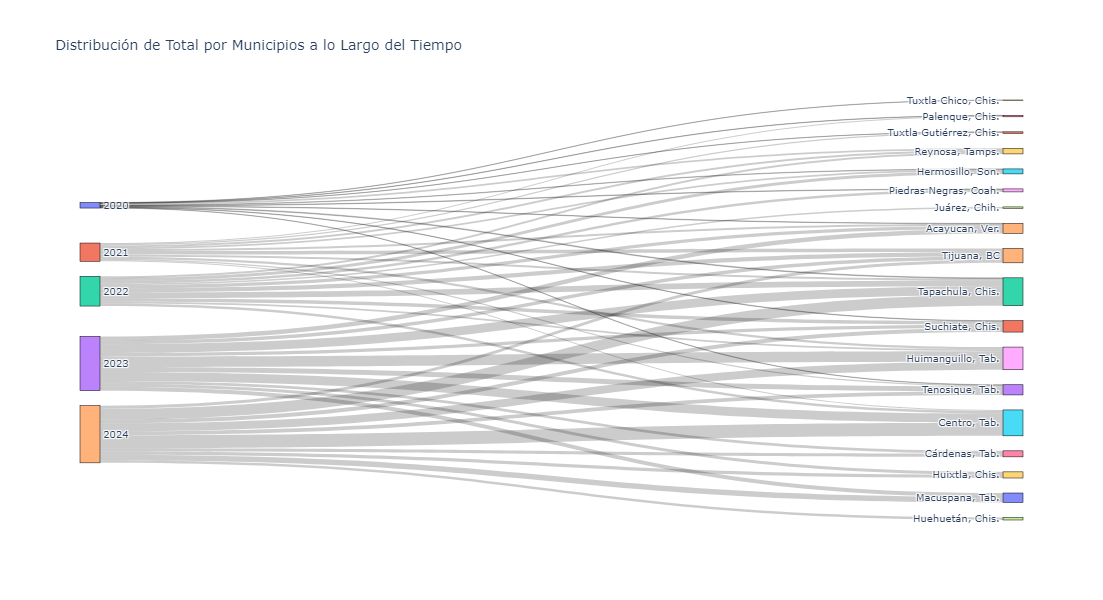

In [41]:
# Filtrar los 10 municipios con más registros por año
df_filtered = df_mun.groupby(['Año', 'Entidad Federativa / Municipio'])['Total'].sum().reset_index()
df_filtered['rank'] = df_filtered.groupby('Año')['Total'].rank("dense", ascending=False)
df_top10_per_year = df_filtered[df_filtered['rank'] <= 10]

# Crear listas para los nodos y las conexiones (links)
years = sorted(df_top10_per_year['Año'].unique())
nodes = []
for year in years:
    nodes.append(str(year))
    nodes.extend(df_top10_per_year[df_top10_per_year['Año'] == year]['Entidad Federativa / Municipio'].unique())

node_indices = {node: idx for idx, node in enumerate(nodes)}

sources = []
targets = []
values = []

for year in years:
    year_str = str(year)
    for _, row in df_top10_per_year[df_top10_per_year['Año'] == year].iterrows():
        sources.append(node_indices[year_str])
        targets.append(node_indices[row['Entidad Federativa / Municipio']])
        values.append(row['Total'])

# Crear el diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes,
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

# Ajustar la orientación del gráfico
fig.update_layout(
    title_text="Distribución de Total por Municipios a lo Largo del Tiempo",
    font_size=10,
    height=600,
    width=1000
)

fig.show()


In [52]:
import pandas as pd

# Supongamos que ya has cargado tu DataFrame como df_mun

# Cambiar el nombre de la columna
df_mun = df_mun.rename(columns={"Entidad Federativa / Municipio": "Municipio"})

# Verificar el cambio
print(df_mun.head())


                         Municipio  Total   Año
4             Aguascalientes, Ags.     93  2020
5                   Calvillo, Ags.      1  2020
6                      Cosío, Ags.      4  2020
7                Jesús María, Ags.     13  2020
8  San Francisco de los Romo, Ags.      5  2020


In [58]:
df_mun

,Municipio,Total,Año
4,"Aguascalientes, Ags.",93,2020
5,"Calvillo, Ags.",1,2020
6,"Cosío, Ags.",4,2020
7,"Jesús María, Ags.",13,2020
8,"San Francisco de los Romo, Ags.",5,2020
...,...,...,...
2209,"Fresnillo, Zac.",134,2024
2210,"Guadalupe, Zac.",7,2024
2211,"Trancoso, Zac.",21,2024
2212,"Villa de Cos, Zac.",10,2024


In [66]:
import pandas as pd

# Supongamos que df_mun es el DataFrame original
# Renombramos la columna si no lo has hecho antes
df_mun = df_mun.rename(columns={"Entidad Federativa / Municipio": "Municipio"})

# Pivotar el DataFrame
df_pivot = df_mun.pivot_table(index="Municipio", columns="Año", values="Total", fill_value=0).reset_index()

# Ver el DataFrame resultante
print(df_pivot)


Año                        Municipio   2020   2021    2022    2023   2024
0                  Acacoyagua, Chis.    0.0    0.0     0.0     2.0    0.0
1                       Acala, Chis.    0.0    0.0     0.0     0.0    1.0
2    Acambay de Ruíz Castañeda, Méx.    0.0    0.0     0.0     1.0    0.0
3                  Acapetahua, Chis.  257.0    0.0  4572.0  6320.0   85.0
4           Acapulco de Juárez, Gro.   17.0  122.0    36.0    32.0    0.0
..                               ...    ...    ...     ...     ...    ...
648                   Zumpango, Méx.    0.0    8.0     0.0   155.0  947.0
649            Álamo Temapache, Ver.    0.0    0.0     0.0     3.0    0.0
650            Álvaro Obregón, Mich.    0.0    0.0     0.0     1.0    0.0
651        Ángel Albino Corzo, Chis.    0.0    0.0    24.0     0.0    0.0
652                     Ónavas, Son.    0.0    0.0     0.0     0.0   19.0

[653 rows x 6 columns]


In [61]:
import pandas as pd

# Suponiendo que df_pivot es tu DataFrame con la estructura que mostraste

# Filtrar top 10 municipios por cada año y mostrarlos
for year in df_pivot.columns[1:]:  # Excluir la columna 'Municipio'
    print(f"Top 10 municipios para el año {year}:")
    top_10 = df_pivot[['Municipio', year]].nlargest(10, year)
    print(top_10)
    print("\n" + "-"*50 + "\n")


Top 10 municipios para el año 2020:
Año                Municipio     2020
404          Reynosa, Tamps.  13285.0
528         Tapachula, Chis.   6260.0
385    Piedras Negras, Coah.   4062.0
6             Acayucan, Ver.   3704.0
521          Suchiate, Chis.   3561.0
213         Hermosillo, Son.   3474.0
371          Palenque, Chis.   3309.0
542          Tenosique, Tab.   2950.0
595      Tuxtla Chico, Chis.   2594.0
596  Tuxtla Gutiérrez, Chis.   1884.0

--------------------------------------------------

Top 10 municipios para el año 2021:
Año                Municipio     2021
564              Tijuana, BC  29615.0
231       Huimanguillo, Tab.  18618.0
404          Reynosa, Tamps.  17304.0
528         Tapachula, Chis.  16334.0
6             Acayucan, Ver.  14530.0
213         Hermosillo, Son.  13995.0
542          Tenosique, Tab.  10718.0
596  Tuxtla Gutiérrez, Chis.  10154.0
371          Palenque, Chis.   8992.0
92              Centro, Tab.   8555.0

--------------------------------------

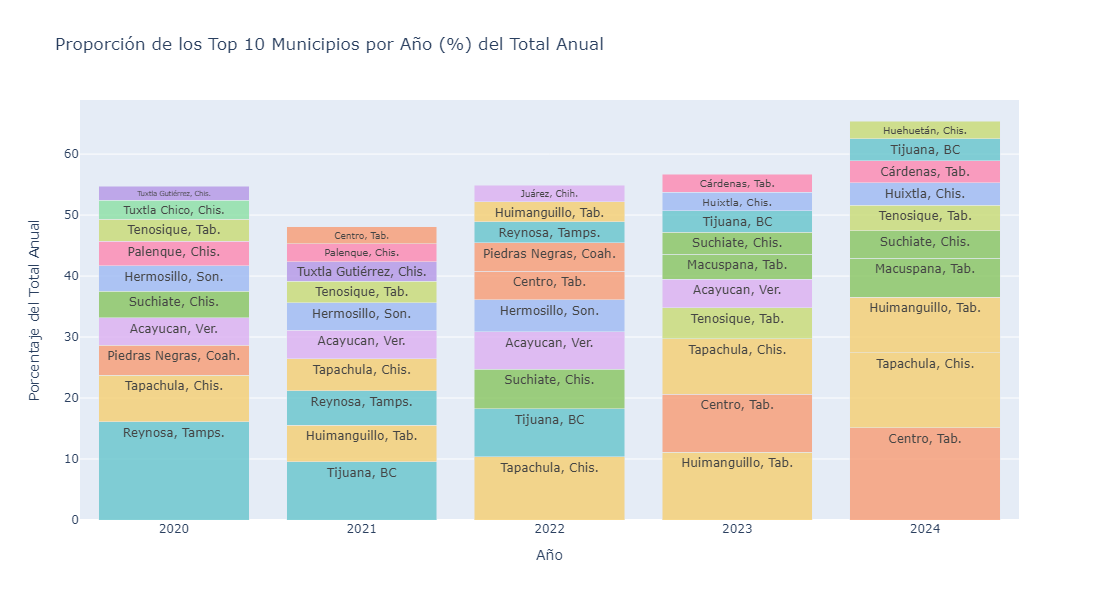

In [84]:
import plotly.graph_objects as go
import plotly.express as px

# Crear un DataFrame vacío para almacenar los datos para la gráfica de barras apiladas
stacked_data = pd.DataFrame()

# Calcular el total de cada año para usarlo como denominador en el cálculo de porcentajes
total_por_ano = df_pivot.sum()

# Recorrer cada año y obtener los top 10 municipios
for year in df_pivot.columns[1:]:  # Excluir la columna 'Municipio'
    top_10 = df_pivot[['Municipio', year]].nlargest(10, year)
    top_10 = top_10.set_index('Municipio')
    
    # Calcular el porcentaje del total del año considerando todos los municipios
    top_10_percentage = (top_10 / total_por_ano[year]) * 100
    
    # Ordenar de mayor a menor
    top_10_percentage = top_10_percentage.sort_values(by=year, ascending=False)
    
    # Añadir al DataFrame acumulado
    stacked_data = pd.concat([stacked_data, top_10_percentage.T])

# Convertir el índice de `stacked_data` para asegurarse de que son strings
stacked_data.index = stacked_data.index.map(str)

# Definir una paleta de colores pastel medio transparentes usando rgba
colors = [
    'rgba(102, 197, 204, 0.8)',
    'rgba(246, 207, 113, 0.8)',
    'rgba(248, 156, 116, 0.8)',
    'rgba(220, 176, 242, 0.8)',
    'rgba(135, 197, 95, 0.8)',
    'rgba(158, 185, 243, 0.8)',
    'rgba(254, 136, 177, 0.8)',
    'rgba(201, 219, 116, 0.8)',
    'rgba(139, 224, 164, 0.8)',
    'rgba(180, 151, 231, 0.8)'
]

# Crear un diccionario para mapear cada municipio a un color
municipio_colors = {municipio: colors[i % len(colors)] for i, municipio in enumerate(stacked_data.columns)}

# Crear una figura de barras apiladas
fig = go.Figure()

# Añadir una barra para cada municipio en cada año con etiquetas, asegurando que el orden sea de mayor a menor
for year in stacked_data.index:
    data_year = stacked_data.loc[year].sort_values(ascending=False)  # Ordenar de mayor a menor para cada año
    for municipio in data_year.index:
        fig.add_trace(go.Bar(
            x=[year],  # Usar lista para asegurar que sea un solo valor por año
            y=[data_year[municipio]],
            name=municipio,
            text=municipio,  # Añadir el nombre del municipio como texto
            textposition='inside',  # Posicionar el texto dentro de las barras
            hoverinfo='y+text',
            marker_color=municipio_colors[municipio]  # Asignar color pastel medio transparente
        ))

# Configurar el layout de la gráfica
fig.update_layout(
    barmode='stack',
    title= "Distribución de los 10 Municipios con Mayor Incidencia de Encuentros con Migrantes Irregulares",
    xaxis_title="Año",
    yaxis_title="Eventos de Encuentros con Migrantes Irregulares (%) del Total Anual",
    showlegend=False,  # Quitar la leyenda
    width=1000,
    height=600
)

fig.show()


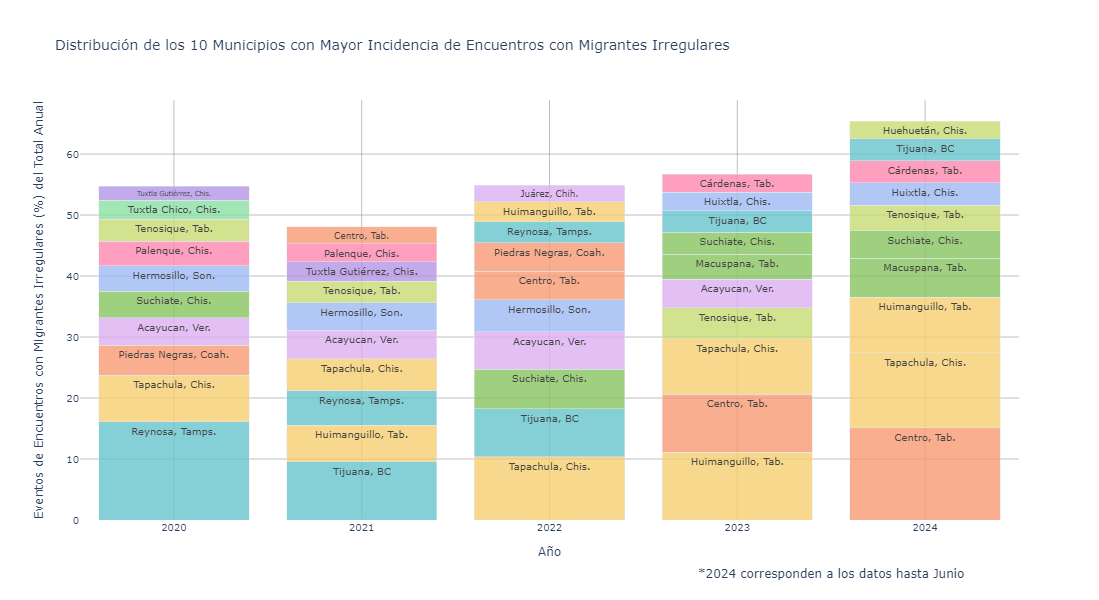

In [90]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Crear un DataFrame vacío para almacenar los datos para la gráfica de barras apiladas
stacked_data = pd.DataFrame()

# Calcular el total de cada año para usarlo como denominador en el cálculo de porcentajes
total_por_ano = df_pivot.sum()

# Recorrer cada año y obtener los top 10 municipios
for year in df_pivot.columns[1:]:  # Excluir la columna 'Municipio'
    top_10 = df_pivot[['Municipio', year]].nlargest(10, year)
    top_10 = top_10.set_index('Municipio')
    
    # Calcular el porcentaje del total del año considerando todos los municipios
    top_10_percentage = (top_10 / total_por_ano[year]) * 100
    
    # Ordenar de mayor a menor
    top_10_percentage = top_10_percentage.sort_values(by=year, ascending=False)
    
    # Añadir al DataFrame acumulado
    stacked_data = pd.concat([stacked_data, top_10_percentage.T])

# Convertir el índice de `stacked_data` para asegurarse de que son strings
stacked_data.index = stacked_data.index.map(str)

# Definir una paleta de colores pastel medio transparentes usando rgba
colors = [
    'rgba(102, 197, 204, 0.8)',
    'rgba(246, 207, 113, 0.8)',
    'rgba(248, 156, 116, 0.8)',
    'rgba(220, 176, 242, 0.8)',
    'rgba(135, 197, 95, 0.8)',
    'rgba(158, 185, 243, 0.8)',
    'rgba(254, 136, 177, 0.8)',
    'rgba(201, 219, 116, 0.8)',
    'rgba(139, 224, 164, 0.8)',
    'rgba(180, 151, 231, 0.8)'
]

# Crear un diccionario para mapear cada municipio a un color
municipio_colors = {municipio: colors[i % len(colors)] for i, municipio in enumerate(stacked_data.columns)}

# Crear una figura de barras apiladas
fig = go.Figure()

# Añadir una barra para cada municipio en cada año con etiquetas, asegurando que el orden sea de mayor a menor
for year in stacked_data.index:
    data_year = stacked_data.loc[year].sort_values(ascending=False)  # Ordenar de mayor a menor para cada año
    for municipio in data_year.index:
        fig.add_trace(go.Bar(
            x=[year],  # Usar lista para asegurar que sea un solo valor por año
            y=[data_year[municipio]],
            name=municipio,
            text=municipio,  # Añadir el nombre del municipio como texto
            textposition='inside',  # Posicionar el texto dentro de las barras
            hoverinfo='y+text',
            marker_color=municipio_colors[municipio]  # Asignar color pastel medio transparente
        ))

# Configurar el layout de la gráfica
fig.update_layout(
    barmode='stack',
    title="Distribución de los 10 Municipios con Mayor Incidencia de Encuentros con Migrantes Irregulares",
    xaxis_title="Año",
    yaxis_title="Eventos de Encuentros con Migrantes Irregulares (%) del Total Anual",font=dict(size=10),
    showlegend=False,  # Quitar la leyenda
    width=1000,
    height=600,
    plot_bgcolor='white',  # Fondo blanco
    xaxis=dict(
        showgrid=True, 
        gridcolor='rgba(128, 128, 128, 0.5)'  # Líneas de cuadrícula grises semitransparentes
    ),
    yaxis=dict(
        showgrid=True, 
        gridcolor='rgba(128, 128, 128, 0.5)'  # Líneas de cuadrícula grises semitransparentes
    ),
    annotations=[  # Añadir la anotación personalizada
        dict(
            x=0.8,
            y=-0.15,
            xref='paper',
            yref='paper',
            text='*2024 corresponden a los datos hasta Junio',
            showarrow=False,
            font=dict(size=12),
            xanchor='center'
        )
    ]
)

fig.show()
